In [4]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


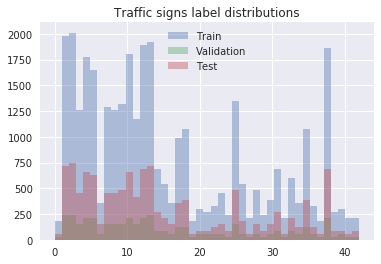

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure()
sns.set(color_codes=True)
sns.distplot(y_train,kde = False, bins=n_classes,label='Train')
sns.distplot(y_valid,kde = False, bins=n_classes,label='Validation')
sns.distplot(y_test,kde = False, bins=n_classes,label='Test')

plt.title('Traffic signs label distributions')
plt.legend()

plt.savefig('readme_files/visual.png')

40


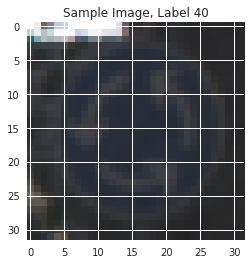

In [7]:
import random

index = random.randint(0,len(X_train))
image = X_train[index].squeeze()

plt.figure()
plt.imshow(image)
print(y_train[index])

plt.title('Sample Image, Label '+str(y_train[index]))
plt.savefig('readme_files/sample.png')

In [8]:
import pickle

with open('Augmented_data/train.p','rb') as f:
    X_train = pickle.load(f)

with open('Augmented_data/train_y.p','rb') as f:
    y_train = pickle.load(f)    

with open('Augmented_data/valid.p','rb') as f:
    X_valid = pickle.load(f)

with open('Augmented_data/test.p','rb') as f:
    X_test = pickle.load(f)

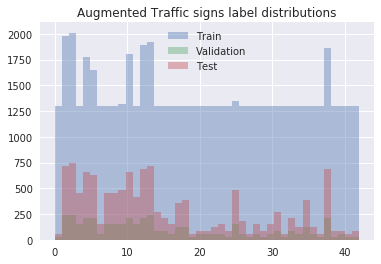

In [9]:
fig = plt.figure()
sns.set(color_codes=True)
sns.distplot(y_train,kde = False, bins=n_classes,label='Train')
sns.distplot(y_valid,kde = False, bins=n_classes,label='Validation')
sns.distplot(y_test,kde = False, bins=n_classes,label='Test')

plt.title('Augmented Traffic signs label distributions')
plt.legend()

plt.savefig('readme_files/aug.png')

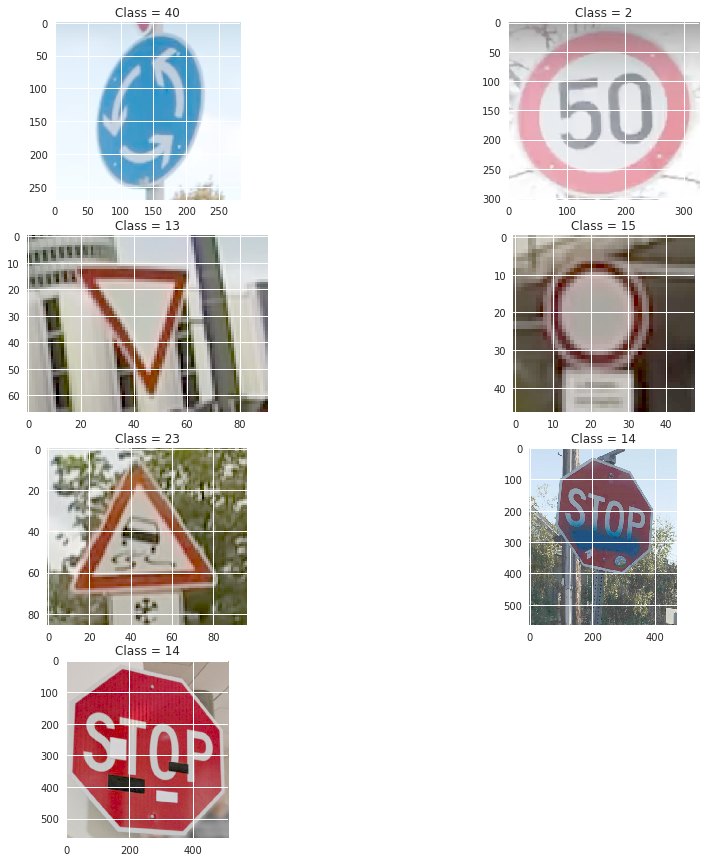

In [10]:
import glob
import imageio

test_labels = np.array([40,2,13,15,23,14,14])
plt.figure(figsize = (15,15))
i=1
for name in sorted(glob.glob('Test_Images/img?.PNG')):
    
    plt.subplot(4,2,i)
    img = imageio.imread(name).astype(np.uint8)
    plt.title('Class = '+ str(test_labels[i-1]))
    plt.imshow(img)
    i+=1
    
plt.savefig('readme_files/new.png')

plt.show()
    

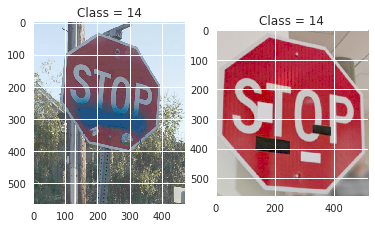

In [23]:
plt.subplot(1,2,1)
img = imageio.imread('Test_Images/img6.PNG').astype(np.uint8)
plt.title('Class = '+ str(test_labels[5]))
plt.imshow(img)

plt.subplot(1,2,2)
img = imageio.imread('Test_Images/img7.PNG').astype(np.uint8)
plt.title('Class = '+ str(test_labels[6]))
plt.imshow(img)

plt.savefig('readme_files/new2.png')

In [11]:

with open('Augmented_data/train.p','rb') as f:
    X_train = pickle.load(f)

with open('Augmented_data/train_y.p','rb') as f:
    y_train = pickle.load(f)    

with open('Augmented_data/valid.p','rb') as f:
    X_valid = pickle.load(f)

with open('Augmented_data/test.p','rb') as f:
    X_test = pickle.load(f)

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 60

BATCH_SIZE = 100

### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    layer1_1 = 100
    layer1_2 = 8
    layer2 = 108
    layer3 = 108

    out = 43
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.

    conv1_w = tf.Variable(tf.truncated_normal(shape = (5,5,1,layer1_1+layer1_2), mean = mu,stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(layer1_1+layer1_2))
    conv1 = tf.nn.conv2d(x, conv1_w, strides =[1,1,1,1], padding='VALID') + conv1_b
    
    # TODO: Activation.
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,layer1_1+layer1_2,layer2], mean = mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(layer2))
    
    conv2 = tf.nn.conv2d(conv1,conv2_w,strides = [1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2,ksize = [1,2,2,1],strides = [1,2,2,1] , padding = 'VALID')
   
   
    conv3_w = tf.Variable(tf.truncated_normal(shape=[5,5,layer2,layer3],mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(layer3))
    
    conv3 = tf.nn.conv2d(conv2,conv3_w,strides = [1,1,1,1],padding = 'VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    # Using MS architecture (multiscale architecture)
    #fc0 = flatten(conv2)
    
    input1 = flatten(conv2)
    input2 = flatten(conv3)
    fc0 = tf.concat([input1,input2],1)
    fc0 = tf.nn.dropout(fc0,keep_prob)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    
    fc1_w = tf.Variable(tf.truncated_normal(shape=(1*1*layer3+5*5*layer2,out),mean=mu,stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(out))
    
    logits = tf.matmul(fc0,fc1_w) + fc1_b
    

    # TODO: Activation.

    #fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    
    #fc2_w = tf.Variable(tf.truncated_normal(shape=(full1,out),mean=mu,stddev=sigma))
    #fc2_b = tf.Variable(tf.zeros(out))
    
    #fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    
    # TODO: Activation.

    #fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    
    #fc3_w = tf.Variable(tf.truncated_normal(shape = (full2,out),mean=mu,stddev=sigma))
    #fc3_b = tf.Variable(tf.zeros(out))
    
    #logits = tf.matmul(fc2,fc3_w) + fc3_b
 
    
    return logits

### Load the images and plot them here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

rate = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob : 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
with tf.Session() as sess:
    
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    test_accuracy = evaluate(X_test,y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.975


In [19]:
import glob
import matplotlib.image as mpimg
import imageio
import os

import tensorflow as tf
import cv2
from skimage import transform
from skimage import util
from skimage import exposure
from scipy.ndimage.interpolation import zoom
import math
import warnings
from sklearn.utils import shuffle



In [20]:
test_imgs = []
test_labels = np.array([40,2,13,15,23,14,14])
for name in sorted(glob.glob('Test_Images/img?.PNG')):

    img = imageio.imread(name).astype(np.uint8)
    img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.resize(img,(32,32))
    img = exposure.equalize_adapthist(img[:,:,0])    
    test_imgs.append(img.astype(np.float32))
    
    
test_imgs = np.array(test_imgs).reshape(-1,32,32)

test_imgs = test_imgs.reshape(-1,32,32,1)
test_labels = test_labels.reshape(7)

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k = 3)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    
    prob = sess.run(top_k, feed_dict = {x: test_imgs, keep_prob : 1.0})
    my_accuracy = evaluate(test_imgs, test_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))
    
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    prob = sess.run(top_k, feed_dict = {x: test_imgs, keep_prob : 1.0})
    print(prob)

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.714


In [21]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    prob = sess.run(top_k, feed_dict = {x: test_imgs, keep_prob : 1.0})
    print(prob)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99981523e-01,   1.83954107e-05,   3.60981822e-08],
       [  9.96065199e-01,   3.91497463e-03,   1.00641610e-05],
       [  9.96908605e-01,   1.84577308e-03,   5.92454569e-04],
       [  9.96045172e-01,   2.69794138e-03,   8.87671718e-04],
       [  9.99998450e-01,   1.14552768e-06,   3.56419974e-07],
       [  9.78011131e-01,   2.02589706e-02,   1.49508868e-03],
       [  9.84147668e-01,   1.31006921e-02,   2.64910562e-03]], dtype=float32), indices=array([[40, 12,  5],
       [ 2,  1, 14],
       [13, 24, 29],
       [15, 12,  1],
       [23,  2, 19],
       [12, 13,  9],
       [ 1,  4, 12]], dtype=int32))
